<a href="https://colab.research.google.com/github/gtimokhina/homework_1_directory/blob/master/dataset_from_google_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.vision import *
from fastai.vision import *

### duck folder

In [0]:
folder = 'duck'
file = 'duck.csv'

In [0]:
path = Path('data/birds')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['duck','goose','pelican']

#### download images

In [5]:
download_images(path/file, dest, max_pics=200)
# if problem above , run this instead
# download_images(path/file, dest, max_pics=20, max_workers=0)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

### goose folder

In [0]:
folder = 'goose'
file = 'goose.csv'

In [0]:
path = Path('data/birds')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['duck','goose','pelican']

#### download images

In [9]:
download_images(path/file, dest, max_pics=200)
# if problem above , run this instead
# download_images(path/file, dest, max_pics=20, max_workers=0)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

### pelican

In [0]:
folder = 'pelican'
file = 'pelican.csv'

In [0]:
path = Path('data/birds')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['duck','goose','pelican']

#### download images

In [13]:
download_images(path/file, dest, max_pics=200)
# if problem above , run this instead
# download_images(path/file, dest, max_pics=20, max_workers=0)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

## check folders

In [14]:
path.ls()

[PosixPath('data/birds/pelican.csv'),
 PosixPath('data/birds/goose'),
 PosixPath('data/birds/duck'),
 PosixPath('data/birds/goose.csv'),
 PosixPath('data/birds/pelican'),
 PosixPath('data/birds/duck.csv'),
 PosixPath('data/birds/cleaned.csv'),
 PosixPath('data/birds/models')]

## remove images that can't be opened

In [15]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)


duck


goose


pelican


## check data

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [17]:
data.classes

['duck', 'goose', 'pelican']

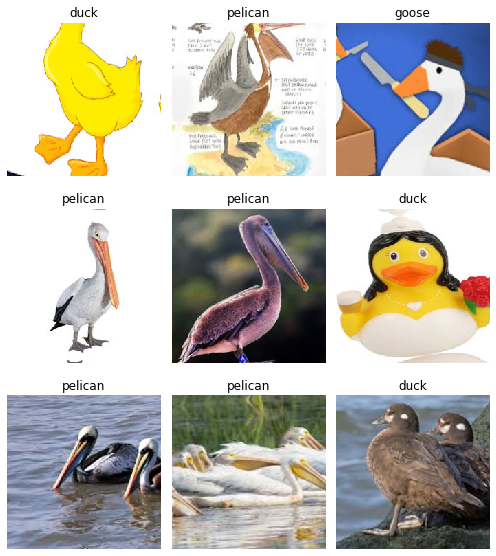

In [18]:
data.show_batch(rows=3, figsize=(7,8))

In [19]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['duck', 'goose', 'pelican'], 3, 432, 108)

## Train Model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.808428,0.729931,0.250000,00:04
1,1.134973,0.625451,0.157407,00:04
2,0.807935,0.583479,0.138889,00:04
3,0.643963,0.565260,0.148148,00:04


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


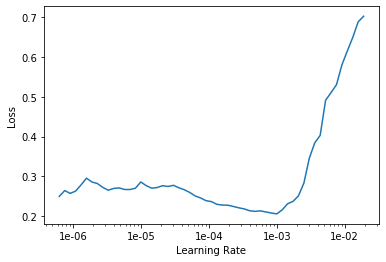

In [25]:
# If the plot is not showing  give a start and end learning rate
#learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.247498,0.516343,0.111111,00:04
1,0.266669,0.521304,0.148148,00:04


In [0]:
learn.save('stage-2')

## Interpretation

In [0]:
learn.load('stage-2');

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

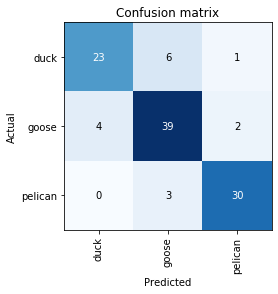

In [30]:
interp.plot_confusion_matrix()

## Cleaning

In [0]:
from fastai.widgets import *

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [34]:

ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path)

In [35]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [0]:
# Don't run this in google colab or any other instances running jupyter lab.
# If you do run this on Jupyter Lab, you need to restart your runtime and
# runtime state including all local variables will be lost.
ImageCleaner(ds, idxs, path, duplicates=True)